# **Итоговое задание Алексея Кондратенко**

### *по Проекту 4. Компьютер говорит "Нет"*


# 1.Импорт и настройка

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
from numpy import percentile
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings

import os

warnings.filterwarnings("ignore")

In [2]:
RANDOM_SEED = 42
!pip freeze > requirements.txt

In [3]:
# этот блок используется на kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
PATH_to_file = '/kaggle/input/sf-dst-scoring/'

# этот блок используется на локальной машине
# PATH_to_file = ''

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/test.csv
/kaggle/input/sf-dst-scoring/train.csv


# 2.Данные

In [4]:
# Предварительная загрузка и просмотр

df = pd.read_csv(PATH_to_file+'train.csv')
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [6]:
# Импортируем данные

train = pd.read_csv(PATH_to_file + 'train.csv')
test= pd.read_csv(PATH_to_file + 'test.csv')

display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

None

In [10]:
display("train: shape" + str(train.shape), train.columns)
display("test: shape" +str(test.shape), test.columns)

'train: shape(73799, 19)'

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

'test: shape(36349, 18)'

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport'],
      dtype='object')

Видим, что в тестовой выборке нет данных признака "default", что логично.

In [9]:
display(train.isna().sum())
display(test.isna().sum())

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

Видим, что и в тренировочной и в тестовом примере отсутствуют значения в признаке "education".

Для обработки данных совместим в один датафрейм тестовую и тренировочную выборки с пометками: train - 1, test = 0

In [12]:
train['Train'] = 1
test['Train'] = 0

Сохраним значения client_id для предсказания тестовой выборки

In [13]:
id_test = test['client_id']

Объединим датафрейми

In [14]:
bank_df = train.append(test, sort=False).reset_index(drop=True)

In [15]:
print(f'bank shape = {bank_df.shape}')
display(bank_df.isna().sum())

bank shape = (110148, 20)


client_id               0
app_date                0
education             478
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
Train                   0
dtype: int64

Пропуски значений есть только в 'education', большое количество пропусков в 'default' связано с объединением тренировочной и тестовой выборки(в тестовой выборке нет значения 'default')

# 3.Преобразование и очистка данных

Заполним пропуски в 'education'

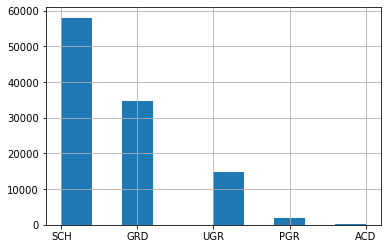

In [16]:
bank_df['education'].hist()

Видим что в данном признаке большинство значений это 'SCH'. Заполним пропуски этим самым часто встречающимся значением.

In [17]:
bank_df['education'].fillna('SCH', inplace=True)

Преобразуем признак 'app_date' в формат с помощью которого мы сможем выделить новые признаки.

In [20]:
bank_df['app_date'] = pd.to_datetime(bank_df['app_date'], format='%d%b%Y')

Разделим признаки на категории для более удобной их обработки и преобразования

In [23]:
display(bank_df.head(3))
display(bank_df.nunique())

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,Train
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0,1
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0,1
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0,1


client_id           110148
app_date               120
education                5
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
default                  2
Train                    2
dtype: int64

In [67]:
num_features = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']
cat_features = ['education', 'home_address', 'work_address', 'sna', 'first_time']
bin_features = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
date_features = ['app_date']

Преобразуем и созданим новые признаки

Так как мы не можем работать с признаком "app_date" без преобразований, выделим из этого признака новые: номер дня в году(day_num), месяц(month), разница между последней указанной датой в датасете +30 дней и датой app_date(app_days_now)

In [68]:
# day_num
bank_df['day_num'] = bank_df['app_date'].apply(lambda x: x.dayofyear)
# month
bank_df['month'] = bank_df['app_date'].apply(lambda x: x.month)
# app_days_now
max_date = bank_df['app_date'].max().date() + timedelta(days=30)
bank_df['app_days_now'] = bank_df['app_date'].apply(lambda x: (max_date - x.date()).days)

In [69]:
# Добавим новые переменные в числовые признаки
num_features.extend(['app_days_now', 'day_num', 'month'])

# 4.Корреляция и распределение признаков

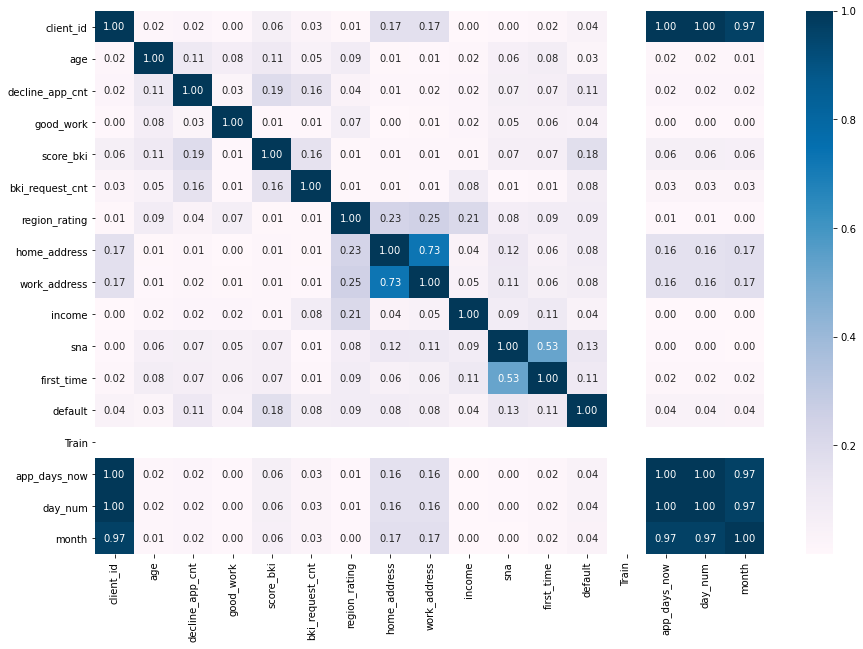

In [70]:
# Рассмотрим корреляцию признаков

plt.figure(figsize=(15, 10))
sns.heatmap(bank_df[bank_df['Train']==1].corr().abs(), annot=True, fmt='.2f', cmap='PuBu')

Видно что 3 новых признака которые были образованы из даты очень сильно коррелируют между собой, удалим 2 из них: day_num, month

In [71]:
bank_df.drop(columns=['day_num', 'month'], inplace=True)

In [74]:
num_features = num_features[:7]

Посмотрим на распределение числовых признаков

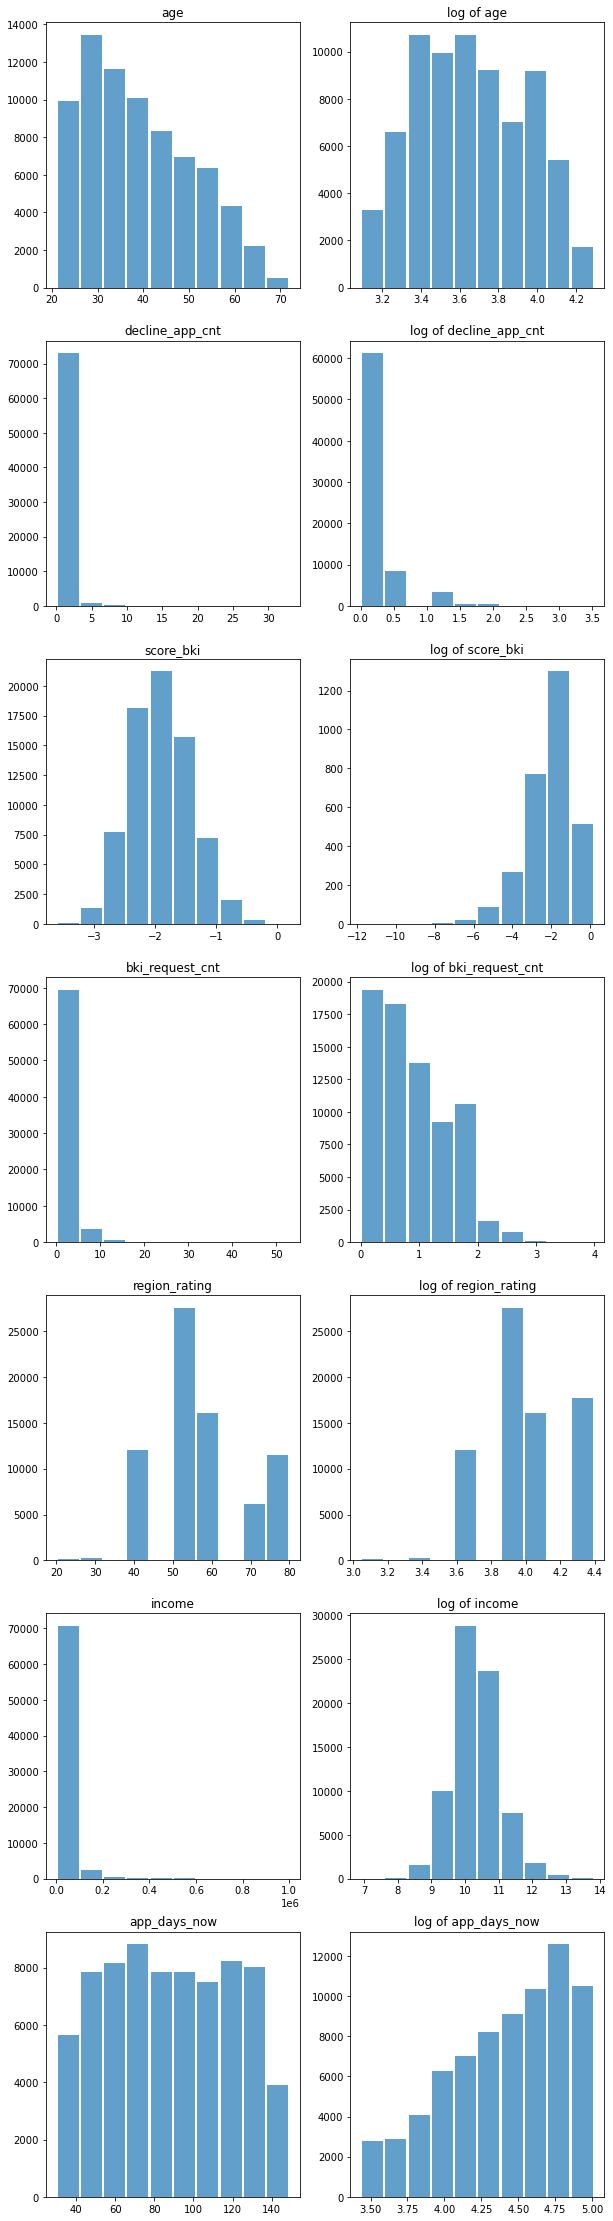

In [76]:
fig, ax = plt.subplots(len(num_features), 2, figsize=(10, 40))


#Изобразим графики значений и логарифма значений

for x in range(len(num_features)):
    new_series_log = np.log(bank_df[bank_df['Train']==1][num_features[x]] + 1)
    
    ax[x, 0].hist(bank_df[bank_df['Train']==1][num_features[x]], rwidth=0.9, alpha=0.7)
    ax[x, 0].set_title(num_features[x])
    
    ax[x, 1].hist(new_series_log, rwidth=0.9, alpha=0.7)
    ax[x, 1].set_title('log of ' + num_features[x])

На основании полученной информации с графиков, следует произвести логарифмическое преобразование следующих признаков:

In [77]:
bank_df['age'] = np.log(bank_df['age'] + 1)
bank_df['decline_app_cnt'] = np.log(bank_df['decline_app_cnt'] + 1)
bank_df['bki_request_cnt'] = np.log(bank_df['bki_request_cnt'] + 1)
bank_df['income'] = np.log(bank_df['income'] + 1)

Посмотрим графически на распределение бинарных и категориальных признаков

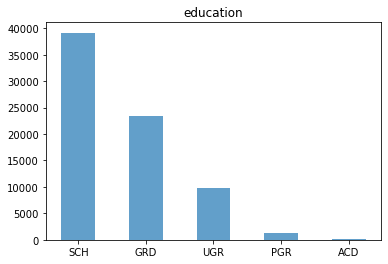

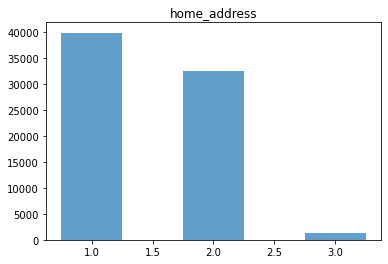

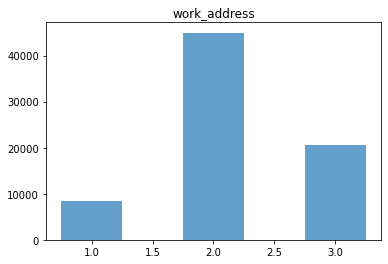

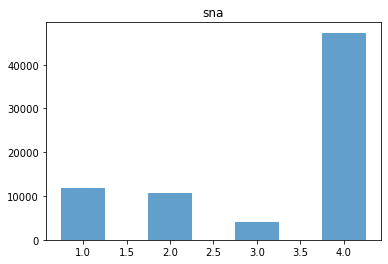

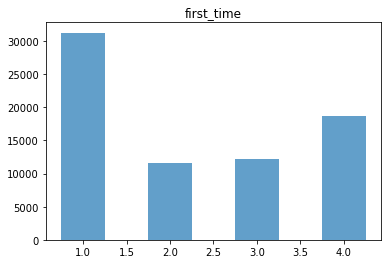

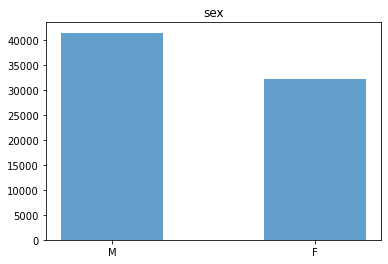

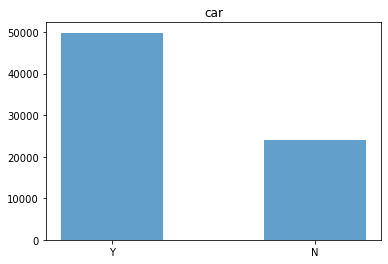

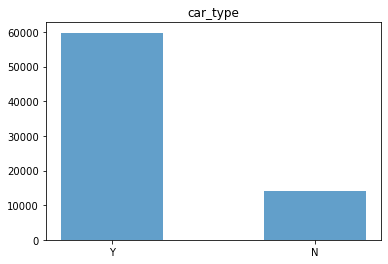

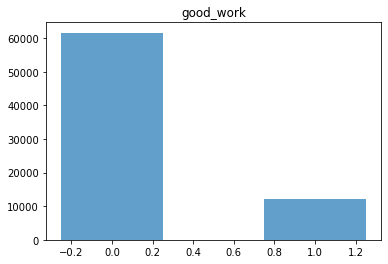

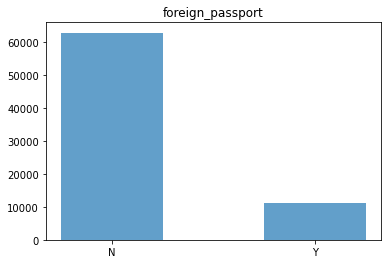

In [78]:
col_list = cat_features + bin_features

plt.figure()
for column in col_list:
    plt.bar(bank_df[bank_df['Train']==1][column].unique(), bank_df[bank_df['Train']==1][column].value_counts(), width=0.5, alpha=0.7)
    plt.title(column)
    plt.show()

In [79]:
# На основании графиков можно сделать следующие вывод:
# В признаке "education" сильно превалирует значение "SCH"
# В признаке "work_address" превалирует значение "2"
# В признаке "sna" превалирует значение "4"
# В признаке "first_time" превалирует значение "1"
# В бинарных признаках только "sex" распределен достаточно равномерно

# 5.Выбросы

In [80]:
# Представим таблицу описания для оценки, что количество выбросов указано корректно
display(bank_df[bank_df['Train']==1][num_features].describe())

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,app_days_now
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,3.655332,0.152451,-1.904724,0.878014,56.725701,10.345886,87.964566
std,0.285077,0.362971,0.498231,0.657881,13.055717,0.697702,32.121884
min,3.091042,0.000000,-3.624586,0.000000,20.000000,6.908755,30.000000
25%,3.433987,0.000000,-2.259534,0.000000,50.000000,9.903538,60.000000
50%,3.637586,0.000000,-1.920823,0.693147,50.000000,10.308986,87.000000
75%,3.891820,0.000000,-1.569831,1.386294,60.000000,10.778977,116.000000
max,4.290459,3.526361,0.199773,3.988984,80.000000,13.815512,149.000000


In [82]:
outlier_dic = {}

for column in num_features:
    perc25 = percentile(bank_df[column], 25)
    perc75 = percentile(bank_df[column], 75)
    iqr = perc75 - perc25
    low_range = perc25 - 1.5 * iqr
    upper_range = perc75 + 1.5 * iqr
    out_count = bank_df[bank_df['Train']==1][column].apply(lambda x: None if x < low_range or x > upper_range else x).isna().sum()
    outlier_dic[column] = [round(low_range, 2), round(upper_range, 2), out_count]

print('Результаты по выбросы:\n')
for key, val in outlier_dic.items():
    print(f'{key}: нижняя граница = {val[0]}, верхняя граница = {val[1]}, количество выбросов = {val[2]}')
    

Результаты по выбросы:

age: нижняя граница = 2.75, верхняя граница = 4.58, количество выбросов = 0
decline_app_cnt: нижняя граница = 0.0, верхняя граница = 0.0, количество выбросов = 12585
score_bki: нижняя граница = -3.3, верхняя граница = -0.53, количество выбросов = 340
bki_request_cnt: нижняя граница = -2.08, верхняя граница = 3.47, количество выбросов = 9
region_rating: нижняя граница = 35.0, верхняя граница = 75.0, количество выбросов = 11975
income: нижняя граница = 8.59, верхняя граница = 12.09, количество выбросов = 1767
app_days_now: нижняя граница = -24.0, верхняя граница = 200.0, количество выбросов = 0


Делаем выводы:
    - признак "decline_app_cnt" имеет очень много выбросов, но это связано с тем, что в распределении сильно преобладает значение 0. Удаление этих значений приведёт к значительной потере данных, поэтому оставим этот признак.
    - признаки "score_bki" и "bki_request_cnt" имеют не большое количество выбросов, посмотрим нужно ли их удалить.
    - признак "income" так же имеет не большое количество выбросов, но это признак удалять не будем
    - признак "region_rating" имеент очень много выбросов, подумаем, стоит ли удалять.

# 6.Значимость переменных

Рассмотрим значимость числовых и бинарных переменных, для этого преобразуем бинарные переменные

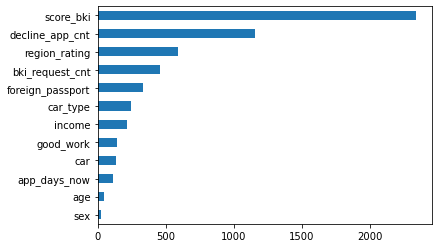

In [83]:
label_encoder = LabelEncoder()

for column in bin_features:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])
    
imp_num = pd.Series(f_classif(bank_df[bank_df['Train']==1][bin_features + num_features], bank_df[bank_df['Train']==1]['default'])[0], index=bin_features + num_features)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

Видим, что самым значимым признаком является "score_bki", далее идёт "decline_app_cnt", "region_rating" и т.д, последним идёт "sex".
Учитывая значимость признаков "decline_app_cnt", "region_rating" и их данные по выбросам, выбросы удалять не будем.

Рассмотрим значимость категориальных переменных

In [85]:
# преобразуем тектовое представление категориального признака в числовое
education_dict = {'SCH': 0, 'GRD': 1, 'UGR': 2,
                  'PGR': 3, 'ACD': 4}
bank_df['education'] = bank_df['education'].apply(lambda x: education_dict[x])

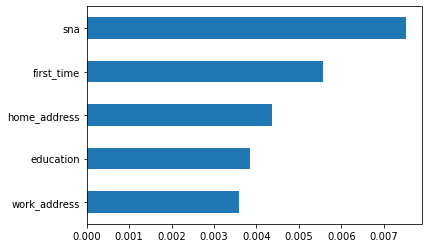

In [86]:
imp_cat = pd.Series(mutual_info_classif(bank_df[bank_df['Train']==1][cat_features], 
                                        bank_df[bank_df['Train']==1]['default'], discrete_features = True), index=cat_features)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Видим, что самым значимым является признак "sna", а самым незначимым "work_address".

# 7. Подготовка данных для обучения модели

In [87]:
bank_train = bank_df[bank_df['Train'] == 1]
bank_test = bank_df[bank_df['Train'] == 0]

In [89]:
# Категориальные признаки преобразовываем
X_cat_train = pd.get_dummies(bank_train[cat_features], columns=cat_features).values
X_cat_test = pd.get_dummies(bank_test[cat_features], columns=cat_features).values

# Стандартизуем числовые признаки
X_num_train = StandardScaler().fit_transform(bank_train[num_features].values)
X_num_test = StandardScaler().fit_transform(bank_test[num_features].values)

# Бинарные признаки
X_bin_train = bank_train[bin_features].values
X_bin_test = bank_test[bin_features].values


# Объединяем данные
X = np.hstack([X_cat_train, X_num_train, X_bin_train])
Y = bank_train['default'].values
test_val = np.hstack([X_cat_test, X_num_test, X_bin_test])

# 8. Регуляризация

Будем использовать параметры регуляризации для улучшения модели(полбор параметров)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_SEED, shuffle=False)

In [92]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Зададим ограничения для параметра регуляризации

In [93]:
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparametrs = dict(C=C, penalty=penalty)

In [94]:
clf = GridSearchCV(model, hyperparametrs, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

In [95]:
print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучший C:', best_model.best_estimator_.get_params()['C'])

Лучший penalty: l2
Лучший C: 7.742636826811269


# 9. Строим модель и рисуем ROC-кривую

In [103]:
model = LogisticRegression(penalty='l2', C=7.742636826811269, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, max_iter=500)

In [104]:
y_pred = model.predict_proba(X_test)[:, 1]

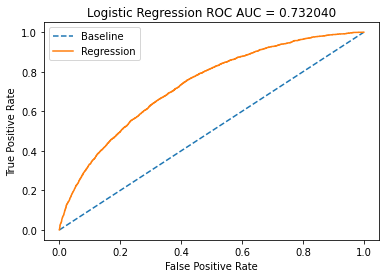

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_val = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'Logistic Regression ROC AUC = {roc_auc_val:4f}')
plt.legend()
plt.show()

# 10. Результат

In [108]:
model_submis = LogisticRegression(penalty='l2', C=7.742636826811269, max_iter=1000)
model_submis.fit(X, Y)
prob_submis = model_submis.predict_proba(test_val)[:, 1]

submission = pd.DataFrame({'client_id': id_test, 'default': prob_submis})

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)